#EDA and Feature Engineering of Student Performance

#Student Performance EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the data
df=pd.read_csv('/content/student performance indicator.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,associate's degree,standard,none,76,81,82
1,male,group C,high school,standard,completed,64,57,62
2,female,group D,high school,free/reduced,none,39,48,49
3,female,group A,associate's degree,standard,none,86,100,96
4,female,group D,some college,standard,completed,66,70,76


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#Conclusion
  No null values were found

In [6]:
df.duplicated().sum()

0

#Conclusion
  No duplicated value were found

In [10]:
#check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
#checking the number of unique values of each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     75
reading score                  73
writing score                  76
dtype: int64

In [12]:
#check the statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,67.39200,70.349000,69.021000
std,15.38366,14.999072,15.785048
min,19.00000,23.000000,20.000000
25%,56.00000,59.750000,58.000000
50%,68.00000,71.000000,70.000000
75%,78.00000,81.000000,80.000000
max,100.00000,100.000000,100.000000


#Observation

*   From the above description of numerical data all mean values are very close to each other between 66 and 71
*   All the standard deviation are also close between 14-16







In [13]:
#Exploring more info about the data
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,associate's degree,standard,none,76,81,82
1,male,group C,high school,standard,completed,64,57,62
2,female,group D,high school,free/reduced,none,39,48,49
3,female,group A,associate's degree,standard,none,86,100,96
4,female,group D,some college,standard,completed,66,70,76


In [14]:
#seperating numerical and categorical features
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print(numerical_feature)

['math score', 'reading score', 'writing score']


In [15]:
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print(categorical_feature)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [19]:
#Aggregating the total score with the mean value
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group C,associate's degree,standard,none,76,81,82,239,79.666667
1,male,group C,high school,standard,completed,64,57,62,183,61.000000
2,female,group D,high school,free/reduced,none,39,48,49,136,45.333333
3,female,group A,associate's degree,standard,none,86,100,96,282,94.000000
4,female,group D,some college,standard,completed,66,70,76,212,70.666667


<Axes: xlabel='average', ylabel='Count'>

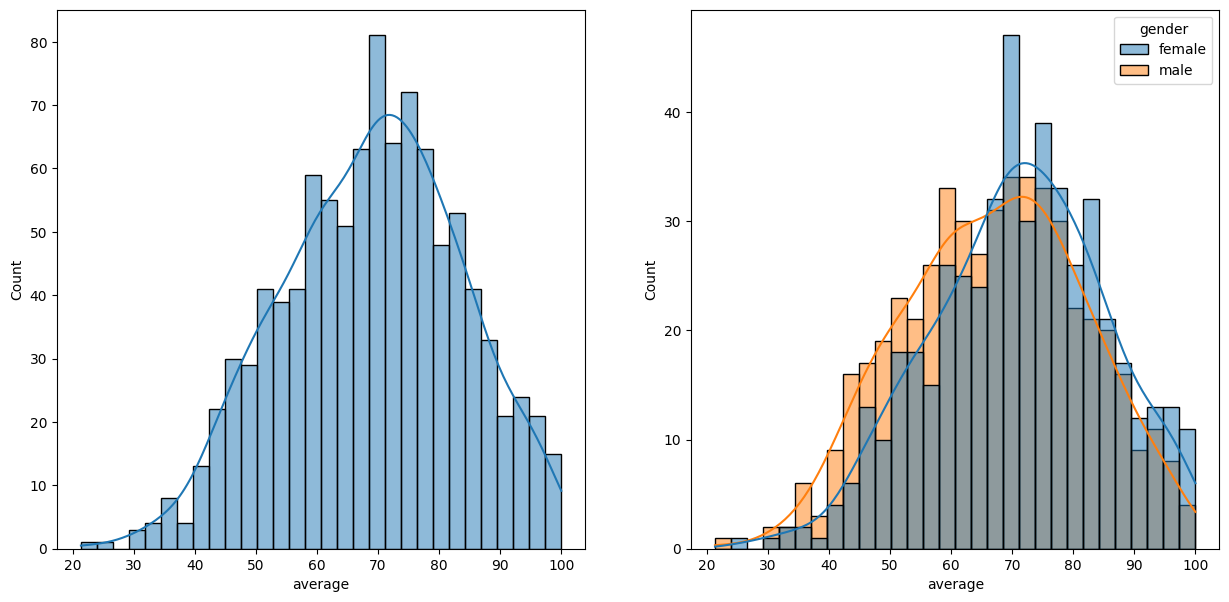

In [24]:
#Exploring more vizualization
import warnings
warnings.filterwarnings('ignore')
plt.subplots(1,3,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True)
plt.subplot(122)
sns.histplot(x=df.average,bins=30,kde=True,hue='gender',data=df)



#Insights:
Female student tend to perform well than male students.

<Axes: xlabel='average', ylabel='Count'>

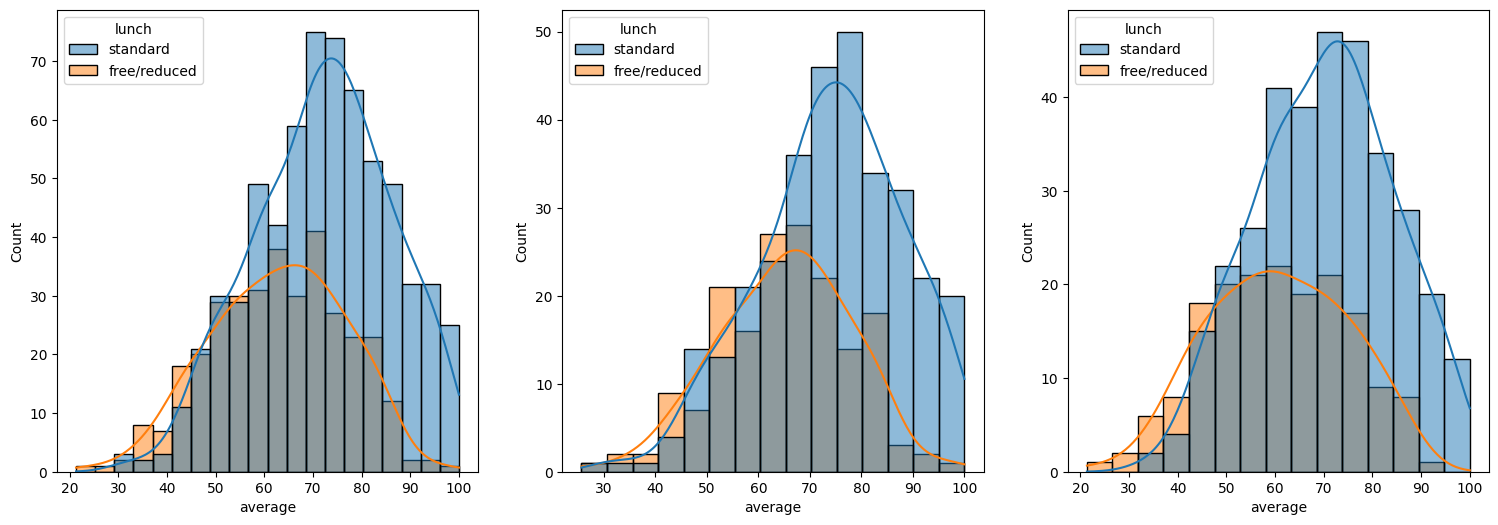

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')


#Insights

*   Standard lunch help students perform well in exams.
*   Standard lunch helps perform well in exams be it male or female



<Axes: xlabel='average', ylabel='Count'>

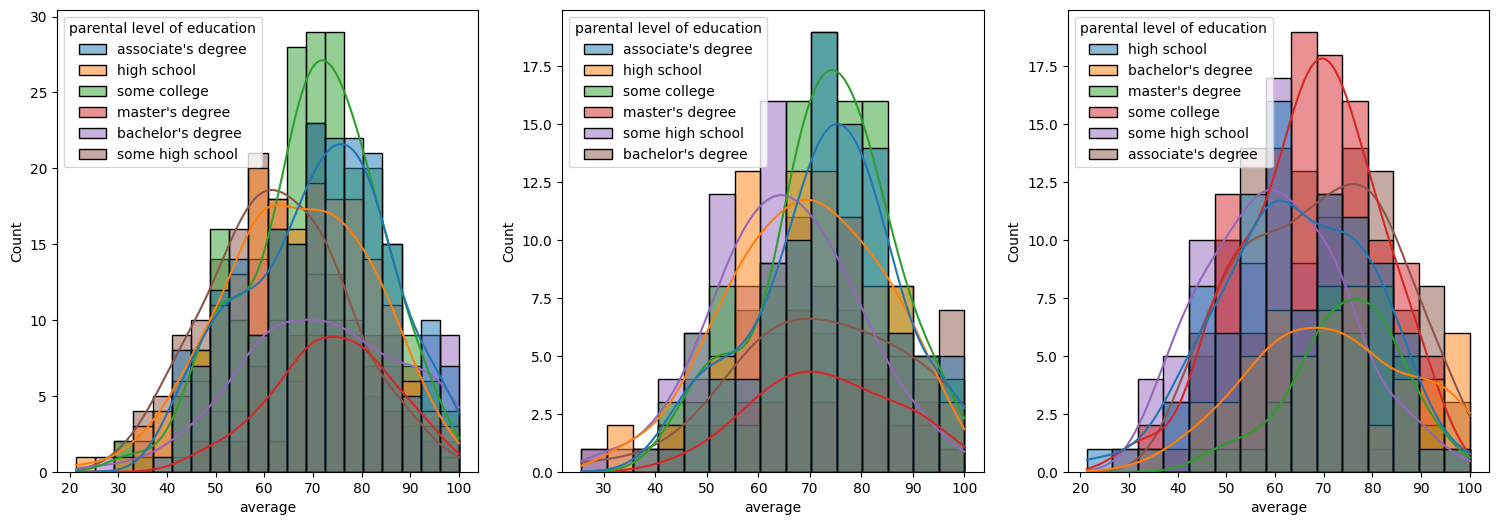

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

#Insights

*   In general parent's education don't help student perform well in exam.
*   In 2nd plot we can see there is no effect of parent's education on female students
*   The 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in the exam





<Axes: xlabel='average', ylabel='Count'>

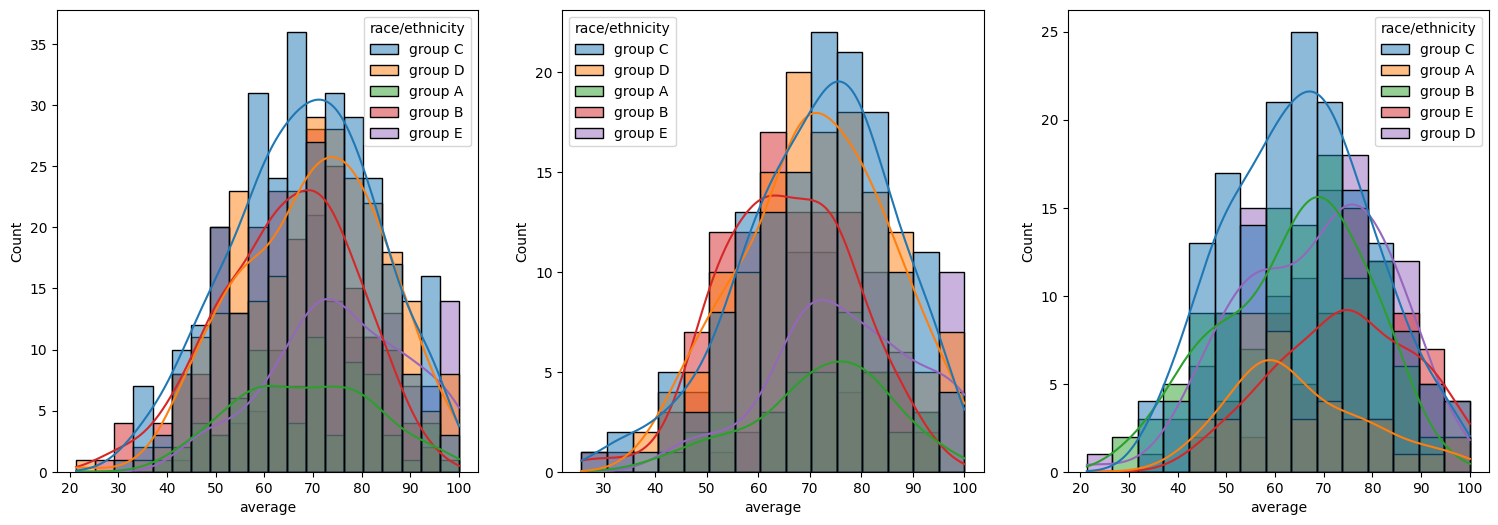

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')

#Insights

*   Students of group A and group E tends to perform poorly in exam.
*   Students of group A and group E tends to perform poorly in exam irrespective of their gender.

